In [1]:
# Importing Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Read the dataset
df1 = pd.read_csv(r"311_Service_Requests_from_2010_to_Present.csv",low_memory = False)
df1.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-2016 00:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-2016 01:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-2016 04:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-2016 07:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-2016 03:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [4]:
# Removing columns which are not relevant
remove_columns = ['Agency Name','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1',
'Intersection Street 2','Address Type','Landmark','Park Facility Name','Park Borough','School Name',
'School Number','School Region','School Code','School Phone Number','School Address','School City',
'School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type',
'Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','X Coordinate (State Plane)','Y Coordinate (State Plane)',
'Location']


df1.drop(remove_columns, inplace=True, axis=1)


In [5]:
# NOw the file size will reduce from 121 MB

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Complaint Type                  300698 non-null  object 
 5   Descriptor                      294784 non-null  object 
 6   Location Type                   300567 non-null  object 
 7   Incident Zip                    298083 non-null  float64
 8   Incident Address                256288 non-null  object 
 9   City                            298084 non-null  object 
 10  Facility Type                   298527 non-null  object 
 11  Status                          300698 non-null  object 
 12  Due Date        

In [7]:
df1 = df1[(df1['Latitude'].notnull())& (df1['Longitude'].notnull()) & (df1['Descriptor'].notnull())]


In [8]:
df1.head(3)

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,City,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,Latitude,Longitude
0,32310363,12/31/2015 11:59:45 PM,01-01-2016 00:55,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,NEW YORK,Precinct,Closed,01-01-2016 07:59,The Police Department responded and upon arriv...,01-01-2016 00:55,12 MANHATTAN,MANHATTAN,40.865682,-73.923501
1,32309934,12/31/2015 11:59:44 PM,01-01-2016 01:26,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,ASTORIA,Precinct,Closed,01-01-2016 07:59,The Police Department responded to the complai...,01-01-2016 01:26,01 QUEENS,QUEENS,40.775945,-73.915094
2,32309159,12/31/2015 11:59:29 PM,01-01-2016 04:51,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,BRONX,Precinct,Closed,01-01-2016 07:59,The Police Department responded and upon arriv...,01-01-2016 04:51,07 BRONX,BRONX,40.870325,-73.888525


In [9]:
df1.nunique()

Unique Key                        291317
Created Date                      252153
Closed Date                       232128
Agency                                 1
Complaint Type                        15
Descriptor                            41
Location Type                         14
Incident Zip                         200
Incident Address                  104602
City                                  53
Facility Type                          1
Status                                 4
Due Date                          252500
Resolution Description                14
Resolution Action Updated Date    232868
Community Board                       74
Borough                                5
Latitude                          123070
Longitude                         123169
dtype: int64

#### 2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. 


In [13]:
df1['Created Date'] = pd.to_datetime(df1['Created Date'])
df1['Closed Date'] = pd.to_datetime(df1['Closed Date'])


# all the data except date/time column s need to be converted to categorical data as the columns are different in size
exclude_columns = ['Created Date','Closed Date']
for col in df1.columns:
    if df1[col].nunique() < 300 and col not in exclude_columns:
        df1[col] = df1[col].astype('category')
        
        
df1.dropna(subset=['Created Date','Closed Date','City'], inplace=True)
df1['Request Closing Time']= df1['Closed Date'] - df1['Created Date']


In [14]:
df1.head(3)

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,City,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,Latitude,Longitude,Request Closing Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,NEW YORK,Precinct,Closed,01-01-2016 07:59,The Police Department responded and upon arriv...,01-01-2016 00:55,12 MANHATTAN,MANHATTAN,40.865682,-73.923501,0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,ASTORIA,Precinct,Closed,01-01-2016 07:59,The Police Department responded to the complai...,01-01-2016 01:26,01 QUEENS,QUEENS,40.775945,-73.915094,0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,BRONX,Precinct,Closed,01-01-2016 07:59,The Police Department responded and upon arriv...,01-01-2016 04:51,07 BRONX,BRONX,40.870325,-73.888525,0 days 04:51:31


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291221 entries, 0 to 300697
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique Key                      291221 non-null  int64          
 1   Created Date                    291221 non-null  datetime64[ns] 
 2   Closed Date                     291221 non-null  datetime64[ns] 
 3   Agency                          291221 non-null  category       
 4   Complaint Type                  291221 non-null  category       
 5   Descriptor                      291221 non-null  category       
 6   Location Type                   291109 non-null  category       
 7   Incident Zip                    291219 non-null  category       
 8   Incident Address                248946 non-null  object         
 9   City                            291221 non-null  category       
 10  Facility Type                   291216 non-n

#### 3.Major insights/patterns that you can offer in a visual format (Data Visualization)

In [16]:
# Complaint type data analysis
df1['Complaint Type'].value_counts()

Blocked Driveway            76713
Illegal Parking             74056
Noise - Street/Sidewalk     47756
Noise - Commercial          35150
Derelict Vehicle            17514
Noise - Vehicle             16871
Animal Abuse                 7747
Traffic                      4472
Noise - Park                 3928
Vending                      3775
Drinking                     1271
Noise - House of Worship      922
Posting Advertisement         648
Disorderly Youth              285
Graffiti                      113
Name: Complaint Type, dtype: int64

<AxesSubplot:>

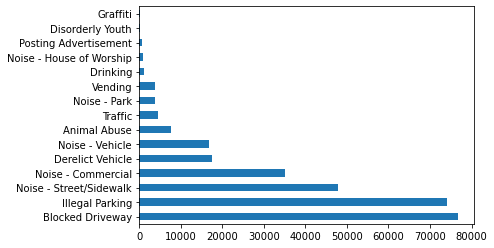

In [17]:
df1['Complaint Type'].value_counts().plot(kind = 'barh')


<AxesSubplot:>

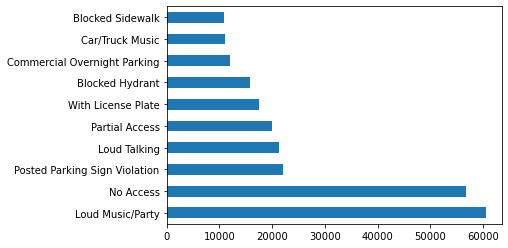

In [18]:
# Complaint Type analysis by Descriptor

df1['Descriptor'].value_counts()[:10].plot(kind = 'barh')

In [19]:
# When we plot the complaints by 'Descriptor', it is clear that
#'Blocked Driveway' has highest of 'No Access' complaints followed by 'Posted Parking Sign Violation' and 'Partial Access'. 
#for noise related complaints, 'Loud Music/Party' has the highest complaints, followed by 'Loud Talking'. 

In [20]:
df1['Borough'].unique().tolist()

['MANHATTAN', 'QUEENS', 'BRONX', 'BROOKLYN', 'STATEN ISLAND']

In [21]:
top6 = ['Blocked Driveway','Illegal Parking','Noise - Street/Sidewalk','Noise - Commercial','Derelict Vehicle','Animal Abuse']
complaint_br = df1.groupby(['Borough','Complaint Type']).size().unstack(level =1)
complaint_br= complaint_br[top6]
complaint_br

Complaint Type,Blocked Driveway,Illegal Parking,Noise - Street/Sidewalk,Noise - Commercial,Derelict Vehicle,Animal Abuse
Borough,,,,,,
BRONX,12744,7833,8864,2431,1949,1413
BROOKLYN,28136,27401,13316,11452,5167,2391
MANHATTAN,2056,11983,20364,14530,530,1511
QUEENS,31636,21955,4397,6060,8104,1875
STATEN ISLAND,2141,4884,815,677,1764,557


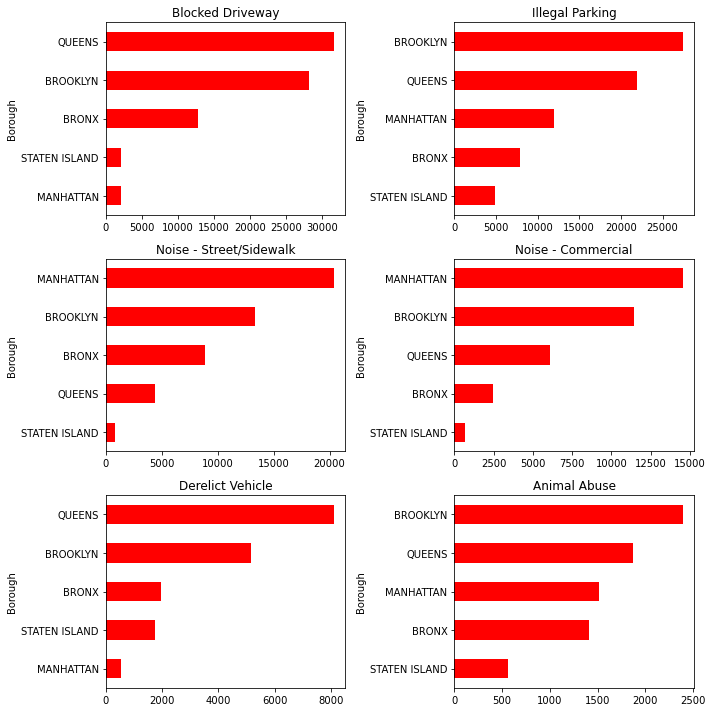

In [22]:
columns = 2
rows = 3
fig, axes = plt.subplots(rows,columns, figsize=(10,10))

for i, (label,col) in enumerate(complaint_br.iteritems()):
    ax = axes[int(i/columns), i%columns]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh',color = "red", ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

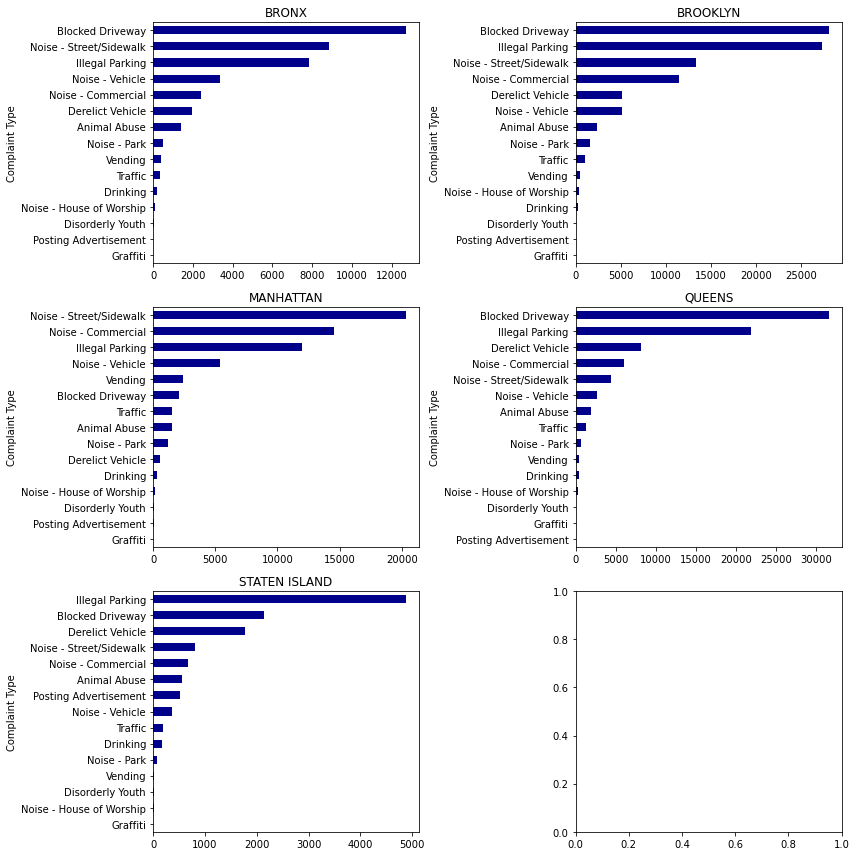

In [23]:
# Visualization of most Complaints per Borough

borough_comp = df1.groupby(['Complaint Type','Borough']).size().unstack()

columns = 2
rows = 3
fig, axes = plt.subplots(rows,columns, figsize=(12,12))

for i, (label,col) in enumerate(borough_comp.iteritems()):
    ax = axes[int(i/columns), i%columns]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh',color="darkblue", ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

<AxesSubplot:>

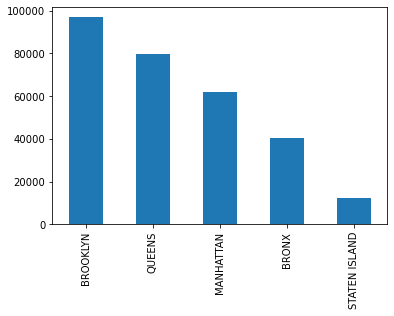

In [24]:
df1['Borough'].value_counts().plot(kind = 'bar')

In [25]:
citywise_complaints = pd.DataFrame(df1['City'].value_counts()[:6])
citywise_complaints

,City
BROOKLYN,96899
NEW YORK,61947
BRONX,40230
STATEN ISLAND,12217
JAMAICA,7163
ASTORIA,6254


<AxesSubplot:ylabel='Complaint counts'>

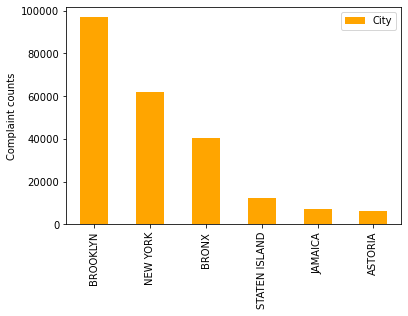

In [26]:
citywise_complaints .plot(ylabel = 'Complaint counts', color= 'orange',kind='bar')

### TreeMaps Visualization 

In [27]:
!pip install squarify

In [28]:
import squarify

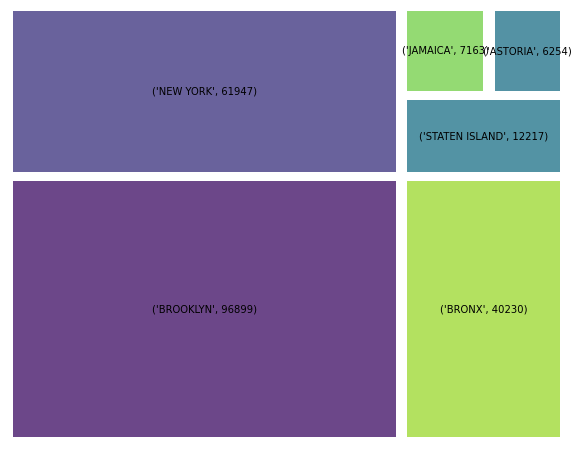

In [32]:
fig = plt.gcf()
fig.set_size_inches(10, 8)
label=zip(list(citywise_complaints.index),citywise_complaints['City'])
squarify.plot(sizes=citywise_complaints['City'], label=label, alpha=0.8,pad =True)
plt.axis('off')
plt.show()

#### 4.Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [33]:
df1['Request Closing Time'].describe()

count                       291221
mean     0 days 04:18:32.055717135
std      0 days 06:03:43.097297834
min                0 days 00:01:00
25%                0 days 01:16:31
50%                0 days 02:42:40
75%                0 days 05:20:24
max               24 days 16:52:22
Name: Request Closing Time, dtype: object

In [34]:
df1['Request_Closing_Hours'] = df1['Request Closing Time'].astype('timedelta64[h]')+1
df1[['Request Closing Time','Request_Closing_Hours']].head()

,Request Closing Time,Request_Closing_Hours
0,0 days 00:55:15,1.0
1,0 days 01:26:16,2.0
2,0 days 04:51:31,5.0
3,0 days 07:45:14,8.0
4,0 days 03:27:02,4.0


In [35]:
mean = df1['Request_Closing_Hours'].mean()
std = df1['Request_Closing_Hours'].std()

print('Mean: ',mean)
print('Std: ',std)

Mean:  4.81866348924013
Std:  6.063755652658765


In [36]:
df1['Request_Closing_Hours'].sort_values().tail()

12167     224.0
12168     224.0
21268     520.0
23664     578.0
244488    593.0
Name: Request_Closing_Hours, dtype: float64

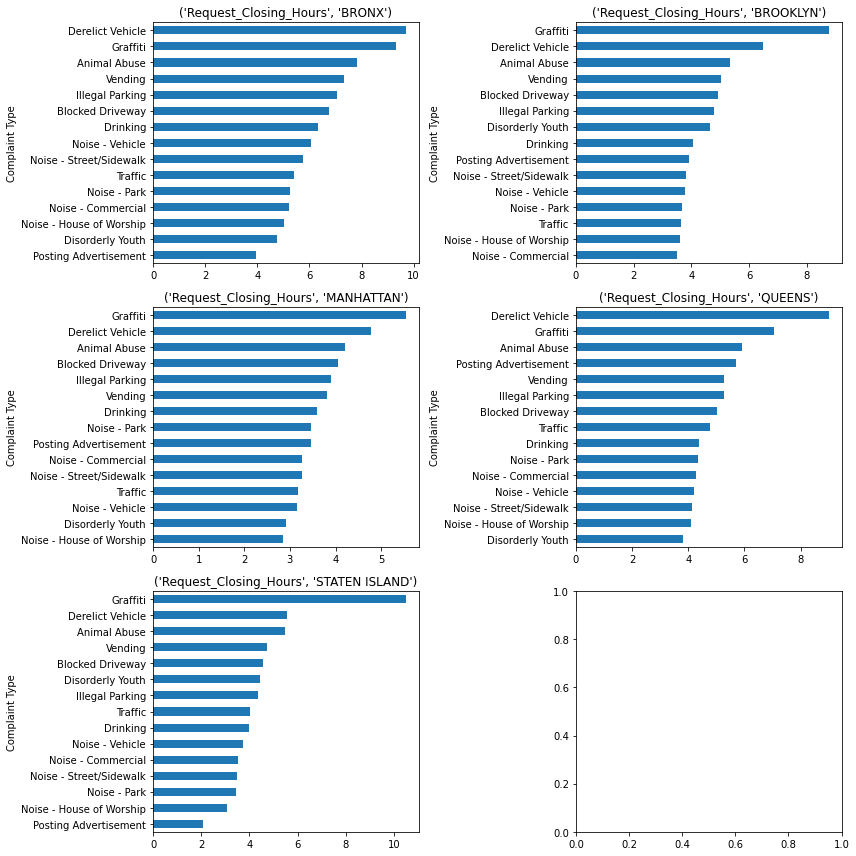

In [37]:
citywise_resolution = df1.groupby(['Complaint Type','Borough'])[['Request_Closing_Hours']].mean().unstack()

columns = 2
rows = 3
fig, axes = plt.subplots(rows, columns, figsize=(12,12))

for i, (label,col) in enumerate(citywise_resolution.iteritems()):
    ax = axes[int(i/columns), i%columns]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()


## Hypothesis Testing

#### 1. Whether the average response time across complaint types is similar or not (overall)

<AxesSubplot:>

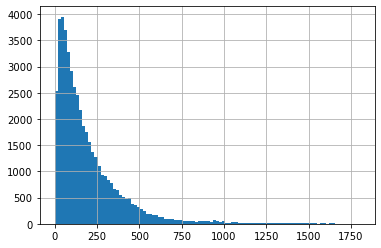

In [38]:
# convert our hourly timedelta into minuted
df1['Request_Closing_Minutes'] = df1['Request Closing Time'].astype('timedelta64[m]')+1

#
df_new = df1[df1['Complaint Type']=='Noise - Street/Sidewalk']['Request_Closing_Minutes']
df_new.hist(bins=100,range=(0,1800))

In [39]:
# data contains too many outliers , hence we will transform the data using log transformation

In [40]:
df_new.describe()

count    47756.000000
mean       207.227343
std        327.155232
min          3.000000
25%         61.000000
50%        133.000000
75%        259.000000
max      35573.000000
Name: Request_Closing_Minutes, dtype: float64

In [41]:
data = {}
for complaint in df1['Complaint Type'].unique():
    data[complaint] = np.log(df1[df1['Complaint Type']==complaint]['Request_Closing_Minutes'])

In [42]:
data.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth'])

<AxesSubplot:>

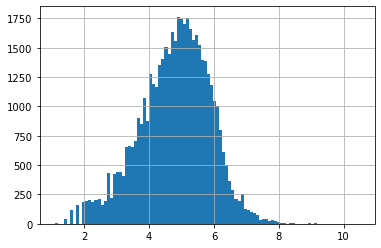

In [43]:
data['Noise - Street/Sidewalk'].hist(bins=100)

<AxesSubplot:>

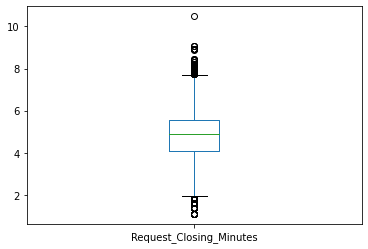

In [44]:
data['Noise - Street/Sidewalk'].plot(kind='box')

In [45]:
for complaints in data.keys():
    print(data[complaints].std())

1.0883037786984964
0.9689120300907598
1.0671606963822484
1.247240997999812
1.0740444730703482
1.1589202042209954
1.1940496830014724
1.0641661804784535
1.0359263541925006
1.0994603809267023
1.169898901097505
1.0358383203301404
1.1063059267654607
1.0581967861803852
1.026822302225286


In [46]:
[ complaint for complaint in data.keys() ]

['Noise - Street/Sidewalk',
 'Blocked Driveway',
 'Illegal Parking',
 'Derelict Vehicle',
 'Noise - Commercial',
 'Noise - House of Worship',
 'Posting Advertisement',
 'Noise - Vehicle',
 'Animal Abuse',
 'Vending',
 'Traffic',
 'Drinking',
 'Noise - Park',
 'Graffiti',
 'Disorderly Youth']

In [47]:
# import f_oneway from scipy.stats library
from scipy.stats import f_oneway

stat, p = f_oneway(data['Noise - Street/Sidewalk'],data['Blocked Driveway'],data['Illegal Parking'],data['Derelict Vehicle'],
                   data['Noise - Commercial'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=2456.370, p=0.000
Different distributions (reject H0)


As our p-value is quite low , hence it is being converted to 0.0

Since our p-value is lower than our critical p-value, we will conclude that we have enough evidence to reject our Null Hypothesis and that

Average response time for all the complaints type is not same.

#### 2. Are the type of complaint or service requested and location related?
To find the correlation between location and complaint types, we will consider below columns
--- Complaint Type
--- Borough
--- City
--- Longitude
--- Latitude

In [48]:
sample = df1[['Complaint Type','Borough','Longitude','Latitude','City']]

In [49]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291221 entries, 0 to 300697
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Complaint Type  291221 non-null  category
 1   Borough         291221 non-null  category
 2   Longitude       291221 non-null  float64 
 3   Latitude        291221 non-null  float64 
 4   City            291221 non-null  category
dtypes: category(3), float64(2)
memory usage: 7.5 MB


In [50]:
# converting Categorical data to numeric values
sample['Complaint Type'] = sample['Complaint Type'].cat.codes
sample['Borough'] = sample['Borough'].cat.codes
sample['City'] = sample['City'].cat.codes

<ipython-input-50-8438f6c54069>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['Complaint Type'] = sample['Complaint Type'].cat.codes
<ipython-input-50-8438f6c54069>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['Borough'] = sample['Borough'].cat.codes
<ipython-input-50-8438f6c54069>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [51]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291221 entries, 0 to 300697
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Complaint Type  291221 non-null  int8   
 1   Borough         291221 non-null  int8   
 2   Longitude       291221 non-null  float64
 3   Latitude        291221 non-null  float64
 4   City            291221 non-null  int8   
dtypes: float64(2), int8(3)
memory usage: 7.5 MB


In [52]:
sample.head()

,Complaint Type,Borough,Longitude,Latitude,City
0,10,2,-73.923501,40.865682,33
1,1,3,-73.915094,40.775945,1
2,1,0,-73.888525,40.870325,6
3,6,0,-73.828379,40.835994,6
4,6,3,-73.874170,40.733060,13


In [53]:
sample.corr(method='pearson')

,Complaint Type,Borough,Longitude,Latitude,City
Complaint Type,1.000000,-0.076788,-0.181756,0.170173,0.094515
Borough,-0.076788,1.000000,0.022161,-0.250863,0.718825
Longitude,-0.181756,0.022161,1.000000,0.368849,-0.119110
Latitude,0.170173,-0.250863,0.368849,1.000000,-0.004037
City,0.094515,0.718825,-0.119110,-0.004037,1.000000
